<a href="https://colab.research.google.com/github/Ritish369/Laptop_Price_Predictor/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(
    "/content/drive/MyDrive/LaptopPricePredictor/laptop_price.csv",
    encoding="ISO-8859-1",
)

In [ ]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
data.shape

(1303, 13)

### For a top level view about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


##### Above it tells that some columns are of object data types just because some small strings are written with them.

### Checking for Duplicate Rows

In [ ]:
data.duplicated().sum()

0

### Checking for missing values

In [ ]:
data.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


### Some Preprocessing

In [ ]:
data.drop(columns=["laptop_ID", "Product"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Removing GB to convert it into a numerical column
data["Ram"] = data["Ram"].str.replace("GB", "").astype("int64")

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Same above process for weight
data["Weight"] = data["Weight"].str.replace("kg", "").astype("float64")

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
# Checking if the data types are corrected now.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


### Performing EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Univariate Analysis

<Axes: xlabel='Price_euros', ylabel='Density'>

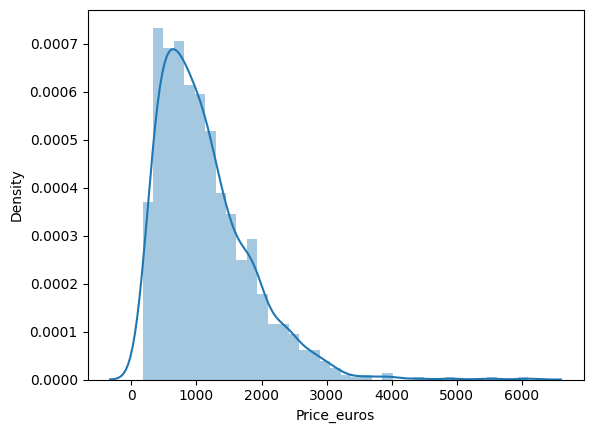

In [ ]:
sns.distplot(data["Price_euros"])

###### Data is skewed.

<Axes: xlabel='Company'>

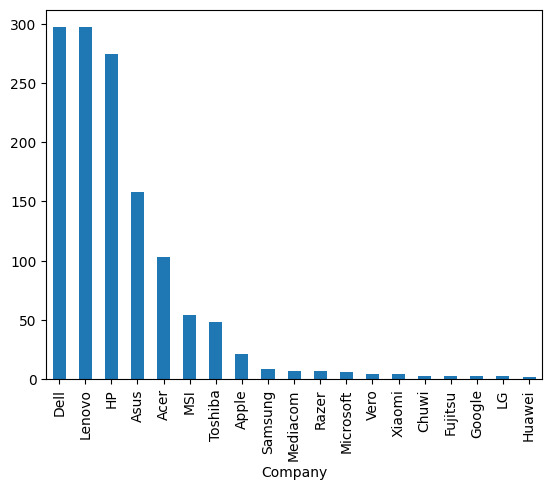

In [ ]:
data["Company"].value_counts().plot(kind="bar")

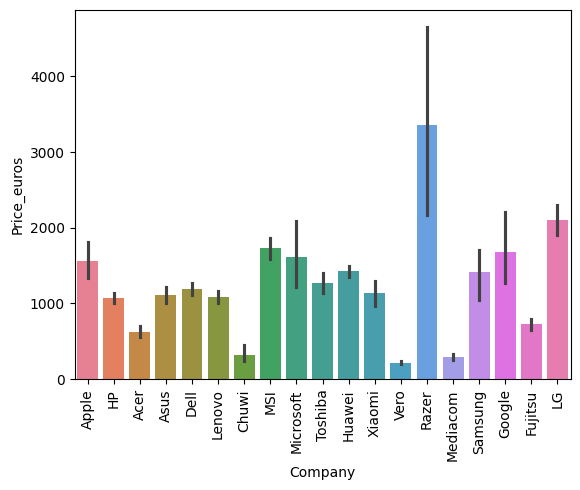

In [ ]:
# Checking the avg company price to see if company has an influence on the prices
sns.barplot(x=data["Company"], y=data["Price_euros"], hue=data["Company"])
plt.xticks(rotation="vertical")
plt.show()

###### Thus, prices do vary with the company

<Axes: xlabel='TypeName'>

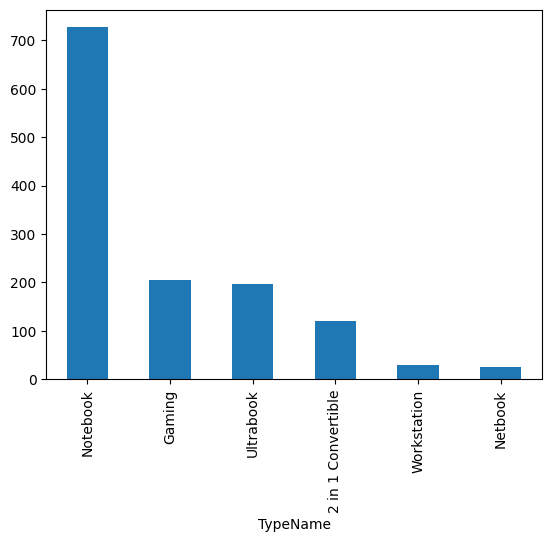

In [ ]:
data["TypeName"].value_counts().plot(kind="bar")

###### Notebook is the budget range laptop

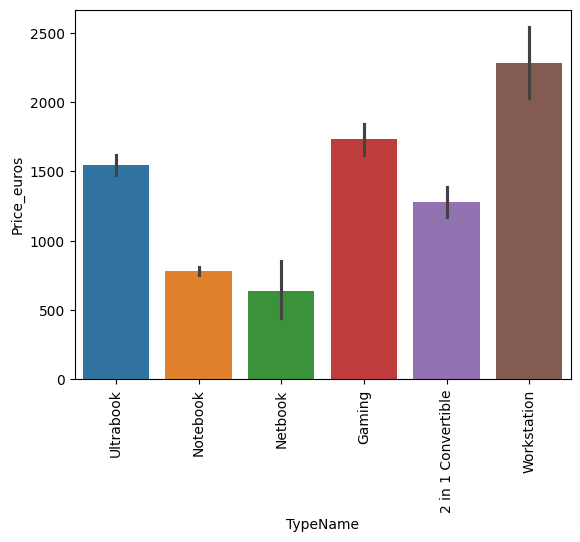

In [ ]:
# Checking avg value for laptop type variation
sns.barplot(x=data["TypeName"], y=data["Price_euros"], hue=data["TypeName"])
plt.xticks(rotation="vertical")
plt.show()

###### Most expensive is workstation

<Axes: xlabel='Inches', ylabel='Density'>

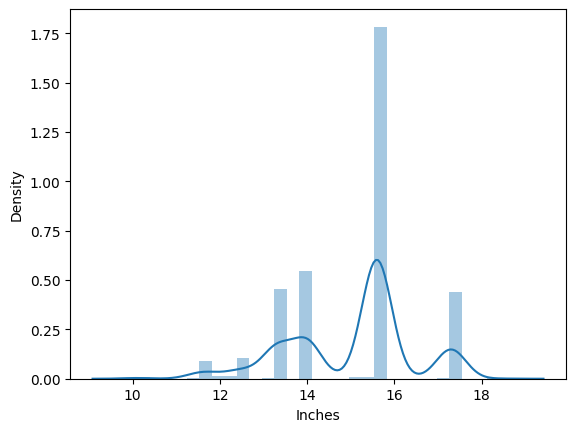

In [ ]:
sns.distplot(data["Inches"])

<Axes: xlabel='Inches', ylabel='Price_euros'>

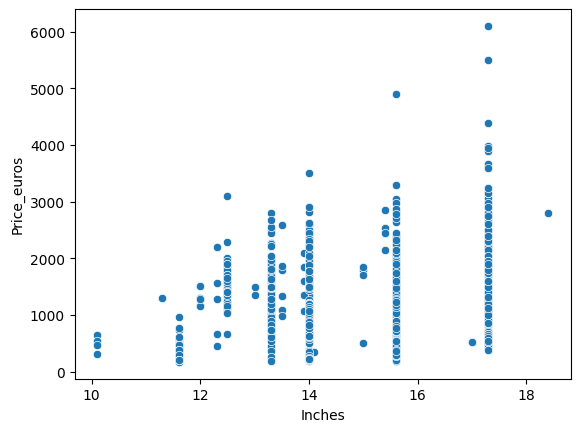

In [ ]:
sns.scatterplot(x=data["Inches"], y=data["Price_euros"])

###### There is a correlation b/w Price and size but not that strong as one column is categorical due to which it is difficult to say

##### This ScreenResolution column has a lot of information in it like resolution, IPS, touchscreen, etc. Thus, helpful. Need to do Feature Engineering.

In [ ]:
data["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
data["Touchscreen"] = data["ScreenResolution"].apply(
    lambda x: 1 if "Touchscreen" in x else 0
)

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [ ]:
# To see if everything is correct
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
529,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,1377.00,0
410,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia Quadro M1200,Windows 10,2.67,1925.00,0
1115,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00,0
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,699.00,0
120,Acer,Notebook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.10,479.00,1
59,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,415.00,0
261,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,No OS,2.20,444.00,0
685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,2813.75,0
766,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,470.34,0
963,Toshiba,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,1790.00,1


<Axes: xlabel='Touchscreen'>

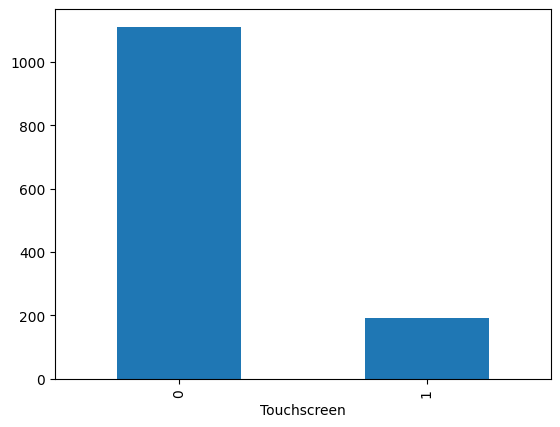

In [ ]:
data["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

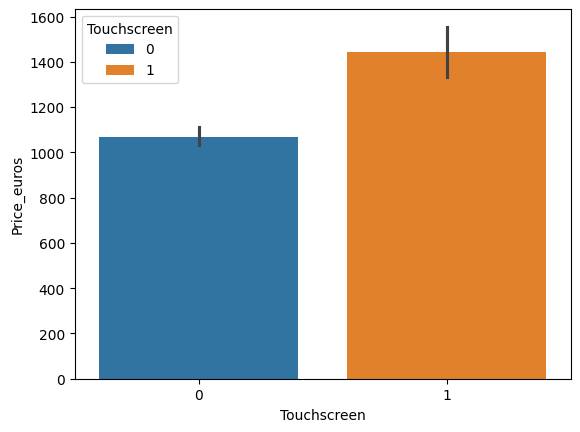

In [ ]:
sns.barplot(x=data["Touchscreen"], y=data["Price_euros"], hue=data["Touchscreen"])

###### Touchscreen laptops are expensive than without it.

In [ ]:
data["Ips"] = data["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


In [ ]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
529,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,1377.00,0,0
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.26,1579.00,0,0
603,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,2199.00,0,0
1240,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,597.57,0,0
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,1770.00,0,1
480,Dell,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.16,1262.00,0,1
1237,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.24,737.00,0,0
235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36,899.00,0,0
990,HP,Netbook,12.5,Full HD 1920x1080,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,1908.00,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<Axes: xlabel='Ips'>

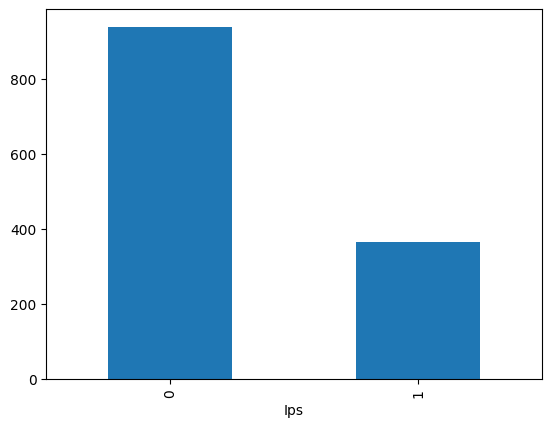

In [ ]:
data["Ips"].value_counts().plot(kind="bar")

<Axes: xlabel='Ips', ylabel='Price_euros'>

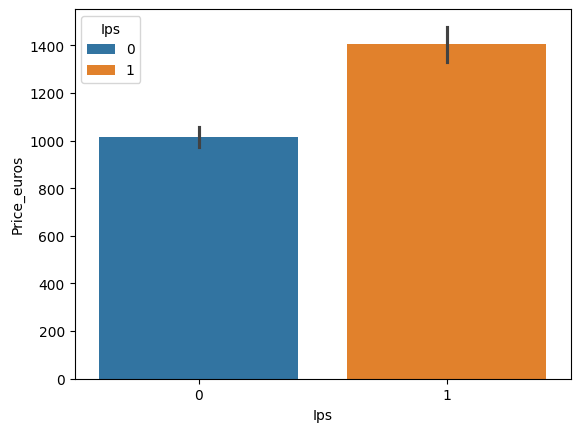

In [ ]:
sns.barplot(x=data["Ips"], y=data["Price_euros"], hue=data["Ips"])

###### IPS display laptops are expensive

##### Getting the X- and Y- resolution of the laptop from ScreenResolution

In [ ]:
temp_df = data["ScreenResolution"].str.split("x", n=1, expand=True)

In [ ]:
data["X_res"] = temp_df[0]
data["Y_res"] = temp_df[1]

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
# Need to write a regular expression for getting the actual X_res value from the current X_res column
# Also, all values are in a list and need to get values out of it. Thus, used the lambda function.
data["X_res"] = (
    data["X_res"].str.replace(",", "").str.findall(r"(\d+\.?\d+)").apply(lambda x: x[0])
)

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [ ]:
# Need to convert the data types of the resolutions to integer.
data["X_res"] = data["X_res"].astype("int64")
data["Y_res"] = data["Y_res"].astype("int64")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


##### Finding correlations now

In [ ]:
data.corr(numeric_only=True)["Price_euros"].sort_values(ascending=False)

,Price_euros
Price_euros,1.000000
Ram,0.743007
X_res,0.556529
Y_res,0.552809
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


##### Since X_res, Y_res seem to be an important features, thus, trying to get a feature out of X_res, Y_res and inches columns. This is what we call pixels per inch(PPI). Also, generally, price increases as ppi increases.

In [ ]:
data["PPI"] = (
    ((data["X_res"] ** 2 + data["Y_res"] ** 2)) ** 0.5 / data["Inches"]
).astype("float")

In [ ]:
data.corr(numeric_only=True)["Price_euros"].sort_values(ascending=False)

,Price_euros
Price_euros,1.000000
Ram,0.743007
X_res,0.556529
Y_res,0.552809
PPI,0.473487
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


###### PPI has a strong correlation with the price.

###### Now, all thee info from ScreenResolution has been extracted. Thus, can drop that col and the related cols.

In [ ]:
data.drop(columns=["ScreenResolution"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [ ]:
data.drop(columns=["Inches", "X_res", "Y_res"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


##### As was the case with the ScreenResolution column, similar is the case with the CPU column

In [ ]:
data["Cpu"].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M7-6Y75 1.2GHz,1
Intel Core i5 7200U 2.50GHz,1
Intel Core i5 7200U 2.70GHz,1


###### Since type of cpu is a categorical variable, thus, need to get differnet categories from this column separated.


In [ ]:
data["Cpu Name"] = data["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [ ]:
# Function to get the cpu type(brand) is made for easier categorization
def fetch_processor(text):
    if text in ["Intel Core i7", "Intel Core i5", "Intel Core i3"]:
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [ ]:
data["Cpu brand"] = data["Cpu Name"].apply(fetch_processor)

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

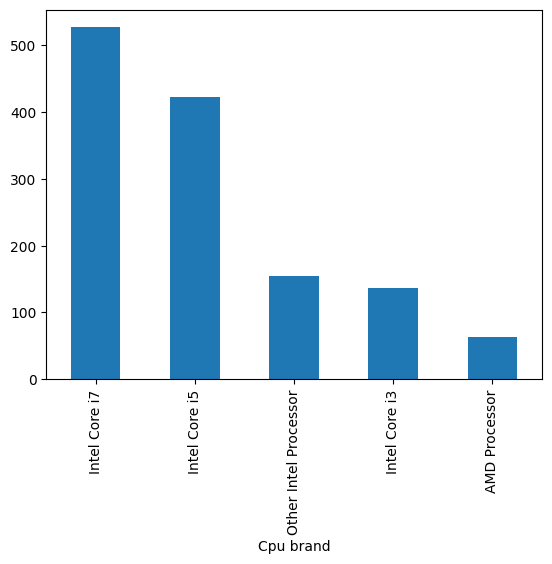

In [ ]:
data["Cpu brand"].value_counts().plot(kind="bar")

###### Intel i7 is more as many series of it are there and thus, summed.

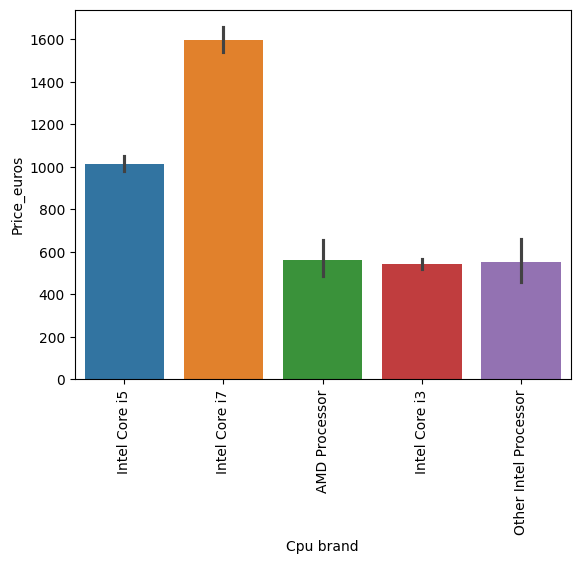

In [ ]:
sns.barplot(x=data["Cpu brand"], y=data["Price_euros"], hue=data["Cpu brand"])
plt.xticks(rotation="vertical")
plt.show()

###### Price depends on the cpu brand as shown. Better the cpu, epensive is the laptop.

In [ ]:
# Now, dropping Cpu and Cpu Name columns as a better and required feature has been extracted.
data.drop(columns=["Cpu", "Cpu Name"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

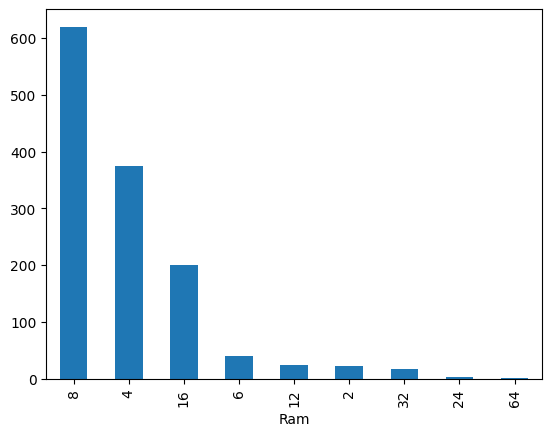

In [ ]:
data["Ram"].value_counts().plot(kind="bar")

###### 8 GB RAM is the most popular.

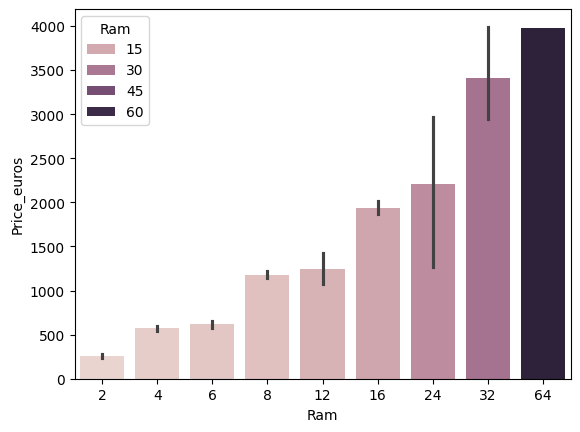

In [ ]:
sns.barplot(x=data["Ram"], y=data["Price_euros"], hue=data["Ram"])
plt.show()

###### Price increases as RAM increases. THus, linear correlation. Important Column.

In [ ]:
data["Memory"].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


###### 4 features can be seemingly extracted from this column. HDD, SSD, Flash Storage & Hybrid ones.

In [ ]:
# Converting the storage to a std unit of GB and then removing it.
data["Memory"] = data["Memory"].astype(str).replace(r"\.0", "", regex=True)
data["Memory"] = data["Memory"].str.replace("GB", "")
data["Memory"] = data["Memory"].str.replace("TB", "000")

In [ ]:
data["Memory"].value_counts()

,count
Memory,
256 SSD,412
1000 HDD,224
500 HDD,132
512 SSD,118
128 SSD + 1000 HDD,94
128 SSD,76
256 SSD + 1000 HDD,73
32 Flash Storage,38
2000 HDD,16


In [ ]:
# Separating the types of storage within a laptop, if any, and converting it into a dataframe
temp_df = data["Memory"].str.split("+", n=1, expand=True)

In [ ]:
temp_df.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [ ]:
# Separation into two separate cols in the  original data dataframe
data["first"] = temp_df[0]
data["first"] = data["first"].str.strip()
data["second"] = temp_df[1]

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD,None


In [ ]:
# Separating the first co into type of storage(into 4 cols)
data["PrimaryHDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["PrimarySSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["PrimaryHybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["PrimaryFlash"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,first,second,PrimaryHDD,PrimarySSD,PrimaryHybrid,PrimaryFlash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [ ]:
# rEMOVING ANY NON-DIGITS HERE
data["first"] = data["first"].str.replace(r"\D", "", regex=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,first,second,PrimaryHDD,PrimarySSD,PrimaryHybrid,PrimaryFlash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,None,0,1,0,0


In [ ]:
# Filling any null values as algorithms love to work with numbers only.
data.fillna({"second": "0"}, inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,first,second,PrimaryHDD,PrimarySSD,PrimaryHybrid,PrimaryFlash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,0,0,1,0,0


In [ ]:
# As was the case with the primary storage, similar is the case for the secondary storage
data["SecondaryHDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["SecondarySSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["SecondaryHybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["SecondaryFlash"] = data["second"].apply(
    lambda x: 1 if "Flash Storage" in x else 0
)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,first,second,PrimaryHDD,PrimarySSD,PrimaryHybrid,PrimaryFlash,SecondaryHDD,SecondarySSD,SecondaryHybrid,SecondaryFlash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
# rEMOVING ANY NON-DIGITS HERE
data["second"] = data["second"].str.replace(r"\D", "", regex=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,first,second,PrimaryHDD,PrimarySSD,PrimaryHybrid,PrimaryFlash,SecondaryHDD,SecondarySSD,SecondaryHybrid,SecondaryFlash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
# Converting to integers
data["first"] = data["first"].astype("int64")
data["second"] = data["second"].astype("int64")

In [ ]:
# Merging the Primary and Secondary storage into one column per storage type to get the
# quantity of the storage
data["HDD"] = data["first"] * data["PrimaryHDD"] + data["second"] * data["SecondaryHDD"]
data["SSD"] = data["first"] * data["PrimarySSD"] + data["second"] * data["SecondarySSD"]
data["Hybrid"] = (
    data["first"] * data["PrimaryHybrid"] + data["second"] * data["SecondaryHybrid"]
)
data["Flash"] = (
    data["first"] * data["PrimaryFlash"] + data["second"] * data["SecondaryFlash"]
)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,PrimaryHybrid,PrimaryFlash,SecondaryHDD,SecondarySSD,SecondaryHybrid,SecondaryFlash,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,0,0,0,256,0,0


###### Since all the feature engineering has been done for extracting the details from Memory column into 4 different cols. We can drop the unnecessary related cols.

In [ ]:
data.drop(
    columns=[
        "PrimaryHDD",
        "PrimarySSD",
        "PrimaryHybrid",
        "PrimaryFlash",
        "SecondaryHDD",
        "SecondarySSD",
        "SecondaryHybrid",
        "SecondaryFlash",
        "first",
        "second",
    ],
    inplace=True,
)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash
1247,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,2325.0,0,1,141.211998,Intel Core i7,1000,256,0,0
333,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,1.85,449.0,0,0,141.211998,Intel Core i3,1000,0,0,0
1080,Lenovo,Ultrabook,8,512 SSD,Intel HD Graphics 515,Windows 10,0.99,1399.0,1,1,234.976765,Other Intel Processor,0,512,0,0
40,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Linux,2.00,389.0,0,0,141.211998,Intel Core i3,1000,0,0,0
96,Dell,Notebook,8,1000 HDD,AMD Radeon R5 M430,Linux,2.20,599.9,0,0,141.211998,Intel Core i7,1000,0,0,0


In [ ]:
data.drop(columns=["Memory"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


###### Now, finding the correlations of new numeric cols with Price col

In [ ]:
data.corr(numeric_only=True)["Price_euros"].sort_values(ascending=False)

,Price_euros
Price_euros,1.000000
Ram,0.743007
SSD,0.670799
PPI,0.473487
Ips,0.252208
Weight,0.210370
Touchscreen,0.191226
Hybrid,0.007989
Flash,-0.040511
HDD,-0.096441


###### Because Hybrid and Flash storage types are not having strong correlations thus, dropping them. However, SSD and HDD will be required as they have an influence on the price.

In [ ]:
data.drop(columns=["Hybrid", "Flash"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


##### As was the problem/too-much-info in Memory col, same is for Gpu col.

In [ ]:
data["Gpu"].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R7 Graphics,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


###### Extracting only the Brand name since that is the only useful info as the info after brand-name doesn't have much to become a new col or similar due to those single gpus.

In [ ]:
data["Gpu brand"] = data["Gpu"].apply(lambda x: x.split()[0])

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
data["Gpu brand"].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
# Since no benefit from ARM GPU row, thus, removing it.
data = data[data["Gpu brand"] != "ARM"]

In [ ]:
data["Gpu brand"].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


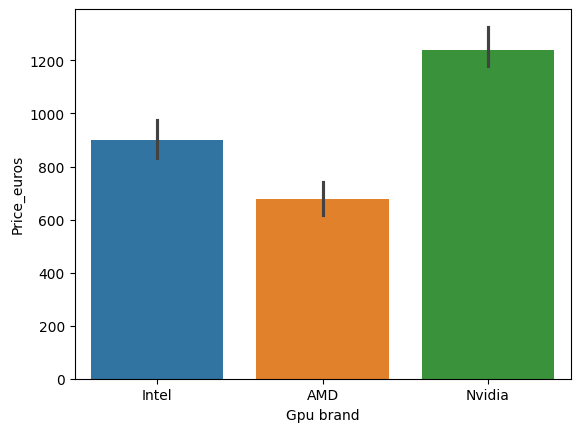

In [ ]:
# Because Nvidia was expensive as compared to others, there could have been an outlier
# influence on Price avg, thus, used median estimator to have a fair plot.
sns.barplot(
    x=data["Gpu brand"],
    y=data["Price_euros"],
    estimator=np.median,
    hue=data["Gpu brand"],
)
plt.show()

###### This shows that no outlier influence. However, prices varies with Gpu brand.

In [ ]:
data = data.drop(columns=["Gpu"])

In [ ]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
data["OpSys"].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


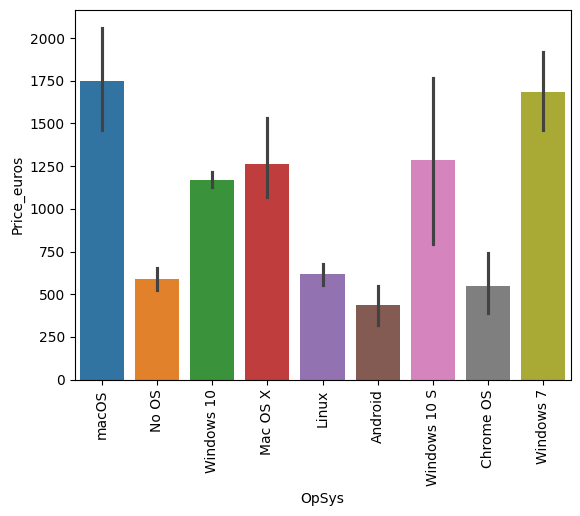

In [ ]:
sns.barplot(x=data["OpSys"], y=data["Price_euros"], hue=data["OpSys"])
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
# Function to categorize OS into fewer categories as too many categories
def cat_os(i_p):
    if i_p in ["Windows 10", "Windows 7", "Windows 10 S"]:
        return "Windows"
    elif i_p in ["macOS", "Mac OS X"]:
        return "Mac"
    else:
        return "Others/No OS/Linux"

In [ ]:
# New column for Operating Systems
data["OS"] = data["OpSys"].apply(cat_os)

In [ ]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
# Dropped because a more concised col formed
data.drop(columns=["OpSys"], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


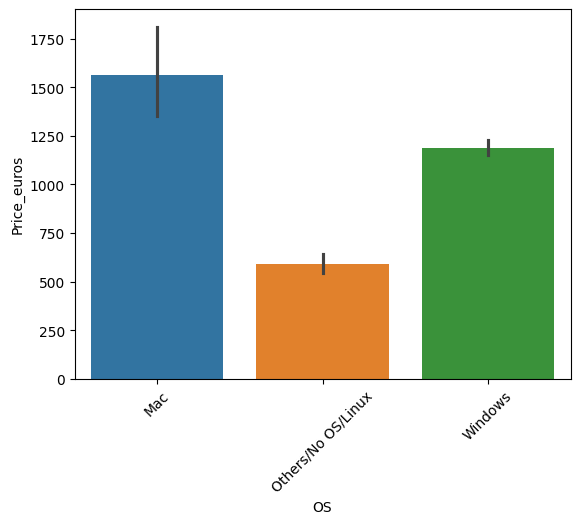

In [ ]:
sns.barplot(x=data["OS"], y=data["Price_euros"], hue=data["OS"])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

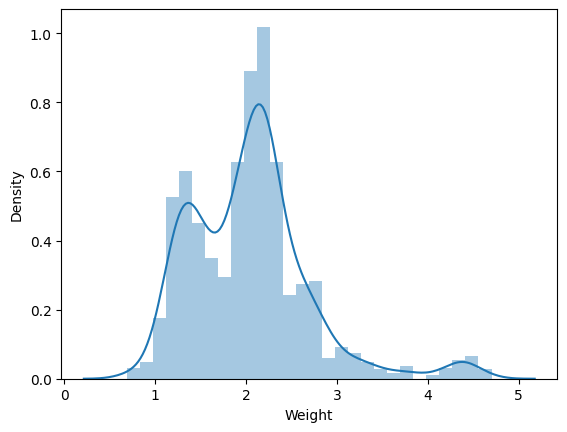

In [ ]:
# Because a continuos variable
sns.distplot(data["Weight"])

<Axes: xlabel='Weight', ylabel='Price_euros'>

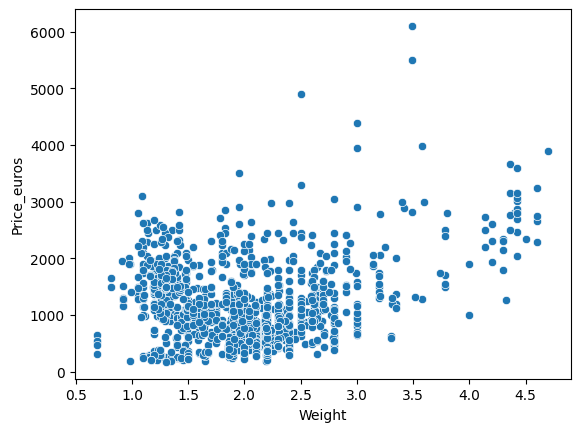

In [ ]:
sns.scatterplot(x=data["Weight"], y=data["Price_euros"])

###### A very weak correlation b/w Weight and Price

In [ ]:
data.corr(numeric_only=True)["Price_euros"].sort_values(ascending=False)

,Price_euros
Price_euros,1.000000
Ram,0.742905
SSD,0.670660
PPI,0.475368
Ips,0.253320
Weight,0.209867
Touchscreen,0.192917
HDD,-0.096891


<Axes: >

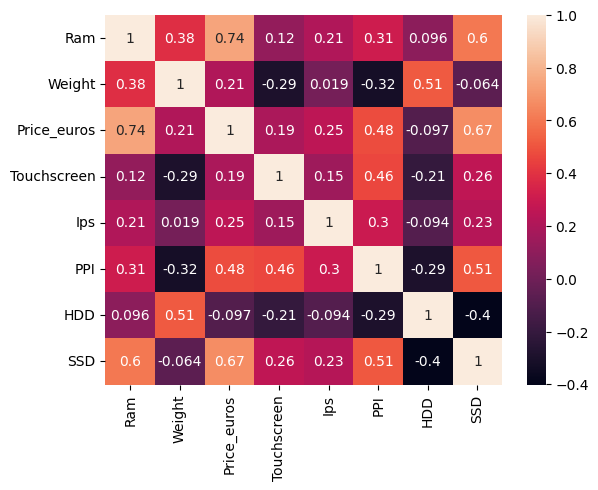

In [ ]:
# For a complete lookup after all preprocessing, in some sense
sns.heatmap(data.corr(numeric_only=True), annot=True)

##### Target Column - Price

###### Because Price is skewed, need to convert it into a symmetric or normal distribution. This can be done by applying log transformation on that col.

<Axes: xlabel='Price_euros', ylabel='Density'>

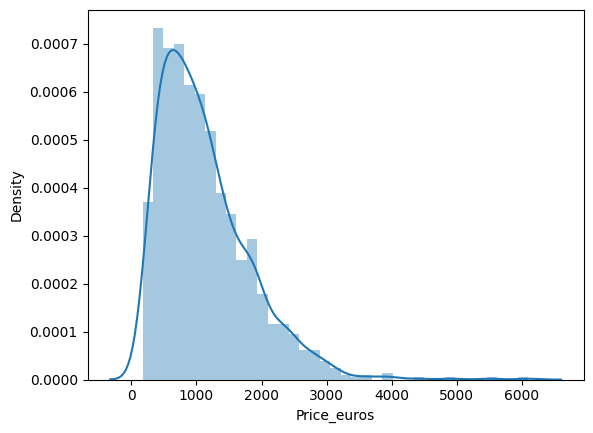

In [ ]:
sns.distplot(data["Price_euros"])

<Axes: xlabel='Price_euros', ylabel='Density'>

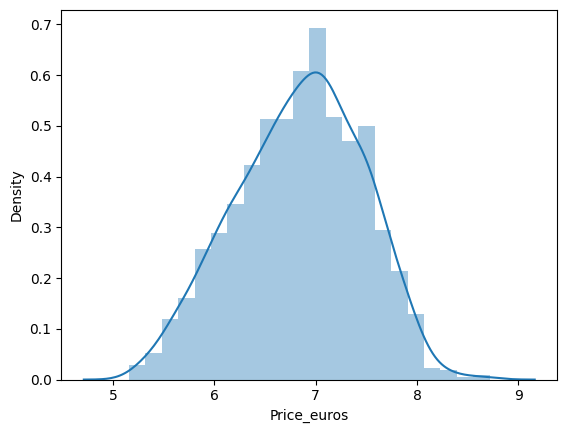

In [ ]:
sns.distplot(np.log(data["Price_euros"]))

#### Data Splitting

In [ ]:
X = data.drop(columns=["Price_euros"])
y = np.log(data["Price_euros"])  ## Use inverse func while predicting

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1298,6.458338
1299,7.312553
1300,5.433722
1301,6.638568


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=3
)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
1054,Dell,Ultrabook,16,1.20,1,0,276.053530,Intel Core i7,0,1000,Intel,Windows
456,Dell,Notebook,8,4.42,0,1,127.335675,Intel Core i7,1000,0,Nvidia,Windows
85,Dell,Gaming,16,2.65,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
891,HP,2 in 1 Convertible,16,1.42,1,0,276.053530,Intel Core i7,0,256,Intel,Windows
152,Lenovo,Notebook,4,1.90,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
789,Dell,Gaming,8,2.62,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
256,HP,Notebook,8,1.91,0,0,100.454670,AMD Processor,0,128,AMD,Windows
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
952,Toshiba,Notebook,8,1.20,0,0,165.632118,Intel Core i5,0,256,Intel,Windows


In [ ]:
y_train

,Price_euros
1054,7.720462
456,7.623642
85,7.207119
891,7.243513
152,6.210600
...,...
789,6.892642
256,6.100095
968,8.054840
952,7.286192


#### One Hot Encoding for handling Categorical Columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#### Necessary ML models to test

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#### Necessary Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
R2 = []
MAE = []
Model = []

# For learning curve plotting
models_curve = {}

#### Linear Regression

In [ ]:
# Creating Column Transformer
step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = LinearRegression()
Model.append(str(step2))
models_curve["LinearRegression"] = step2

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Fitting the pipeline
pipe.fit(X_train, y_train)

# Making predictions
y_pred = pipe.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.7966331340498835
MAE 0.22499621481193594


#### Ridge Regression

In [ ]:
# Creating Column Transformer

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = Ridge()
Model.append(str(step2))

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {"step2__alpha": [7, 8, 9, 10, 11, 12, 13]}
rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object and thus, ultimately, pipeline
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["RidgeRegression"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.7962556246091619
MAE 0.2271741587248067


#### K-NN Regressor

In [ ]:
# Creating Column Transformer

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = KNeighborsRegressor()
Model.append(str(step2))

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {"step2__n_neighbors": [3, 4, 5, 6, 7, 8]}
rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object and thus, ultimately, pipeline
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["KNNRegressor"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.8138107163241984
MAE 0.19703849447352467


#### Decision Tree Regressor

In [ ]:
# Creating Column Transformer
from scipy.stats import randint

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = DecisionTreeRegressor()
Model.append(str(step2))

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {
    "step2__max_depth": randint(5, 11),
    "step2__max_features": [0.25, 0.5, 0.75, 1.0],
}
rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object and thus, ultimately, pipeline
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["DecisionTreeRegressor"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.7874728011795399
MAE 0.2101273965044497


#### SV Regressor

In [ ]:
# Creating Column Transformer

from scipy.stats import uniform

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = SVR(kernel="rbf", C=500)
Model.append(str(step2))
models_curve["Support Vector Regressor"] = step2

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Takes lot of time below thing

# RandomizedSearchCV application
# param_distribs = {"step2__kernel" : ["linear", "rbf", "sigmoid"],
#                   "step2__C" : uniform(100, 0.01)}
# rnd_search = RandomizedSearchCV(pipe, param_distributions=param_distribs, n_iter=20, cv = 6, scoring = "neg_mean_absolute_error", random_state=3)

# # Fitting the rnd_search object and thus, ultimately, pipeline
# rnd_search.fit(X_train, y_train)

# # Getting the best parameters and estimator
# best_param_rand = rnd_search.best_params_
# best_model_rand = rnd_search.best_estimator_

# models_curve["SupportVectorRegressor"] = best_model_rand

pipe.fit(X_train, y_train)

# Making predictions
# y_pred = best_model_rand.predict(X_test)
y_pred = pipe.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.7795971184747434
MAE 0.22467283504127794


#### Random Forest Regressor

In [ ]:
# Creating Column Transformer

from scipy.stats import randint

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(
                            sparse_output=False, drop="first", handle_unknown="ignore"
                        ),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = RandomForestRegressor(bootstrap=True)
Model.append(str(step2))

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {
    "step2__max_depth": randint(6, 16),
    "step2__n_estimators": [100, 500, 700, 900, 1100],
    "step2__max_features": [0.25, 0.5, 0.75, 1.0],
    "step2__max_samples": [0.5, 0.75],
}
rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object and thus, ultimately, pipeline
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["RandomForestRegressor"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.8783069407176776
MAE 0.16498537090381524


#### AdaBoost Regressor

In [ ]:
# Creating Column Transformer

from scipy.stats import uniform

step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = AdaBoostRegressor()
Model.append(str(step2))

# Creating pipeline for automated process of above steps
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {
    "step2__n_estimators": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "step2__learning_rate": uniform(0.1, 2.0),
}
rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object and thus, ultimately, pipeline
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["AdaBoostRegressor"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model using R2 score metric
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.7782898239994727
MAE 0.23742723099057808


#### XgBoost Regressor

In [ ]:
# ColumnTransformer to handle both numerical and categorical missing values
step1 = ColumnTransformer(
    [
        (
            "num_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]
            ),
            [3, 6],
        ),  # Numerical columns
        (
            "cat_trf",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    (
                        "onehot",
                        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
                    ),
                ]
            ),
            [0, 1, 7, 10, 11],
        ),  # Categorical columns
    ],
    remainder="passthrough",
)

# Model
step2 = XGBRegressor()
Model.append(str(step2))

# Creating pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# RandomizedSearchCV application
param_distribs = {
    "step2__max_depth": randint(2, 10),
    "step2__n_estimators": [20, 25, 30, 35, 40, 45, 50],
    "step2__learning_rate": uniform(0.1, 2.0),
}

rnd_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distribs,
    n_iter=20,
    cv=6,
    scoring="neg_mean_absolute_error",
    random_state=3,
)

# Fitting the rnd_search object
rnd_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_param_rand = rnd_search.best_params_
best_model_rand = rnd_search.best_estimator_

models_curve["XGBRegressor"] = best_model_rand

# Making predictions
y_pred = best_model_rand.predict(X_test)

# Evaluating the model
r2scr = r2_score(y_test, y_pred)
R2.append(r2scr)
print("R2 score", r2scr)

maescr = mean_absolute_error(y_test, y_pred)
MAE.append(maescr)
print("MAE", maescr)

R2 score 0.8558718527260664
MAE 0.1783865862094777


In [ ]:
# Created a Dataframe of all the metrics' values of all the models under consideration.
evaluation_metrics = pd.DataFrame(
    data=np.array([R2, MAE]).T, columns=["R2", "MAE"], dtype="float64"
)
evaluation_metrics["Model"] = Model
evaluation_metrics = evaluation_metrics.sort_values(
    by="R2", ascending=False
).reset_index(drop=True)
evaluation_metrics["Model"] = (
    evaluation_metrics["Model"].str.split("(").str[0]
)  # Adjust based on your model naming
evaluation_metrics.set_index("Model", inplace=True)

In [ ]:
evaluation_metrics

,R2,MAE
Model,,
RandomForestRegressor,0.878307,0.164985
XGBRegressor,0.855872,0.178387
KNeighborsRegressor,0.813811,0.197038
LinearRegression,0.796633,0.224996
Ridge,0.796256,0.227174
DecisionTreeRegressor,0.787473,0.210127
SVR,0.779597,0.224673
AdaBoostRegressor,0.778290,0.237427


#### From the above metrics, it is evident that the Random Forest Regressor Model performs the best as it indicates approximately 88% of variance in Price is being explained by the laptop features considered.

In [ ]:
models_curve

{'LinearRegression': LinearRegression(),
 'RidgeRegression': Pipeline(steps=[('step1',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num_trf',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   [3, 6]),
                                                  ('cat_trf',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('onehot',
                                                    

### Learning Curves

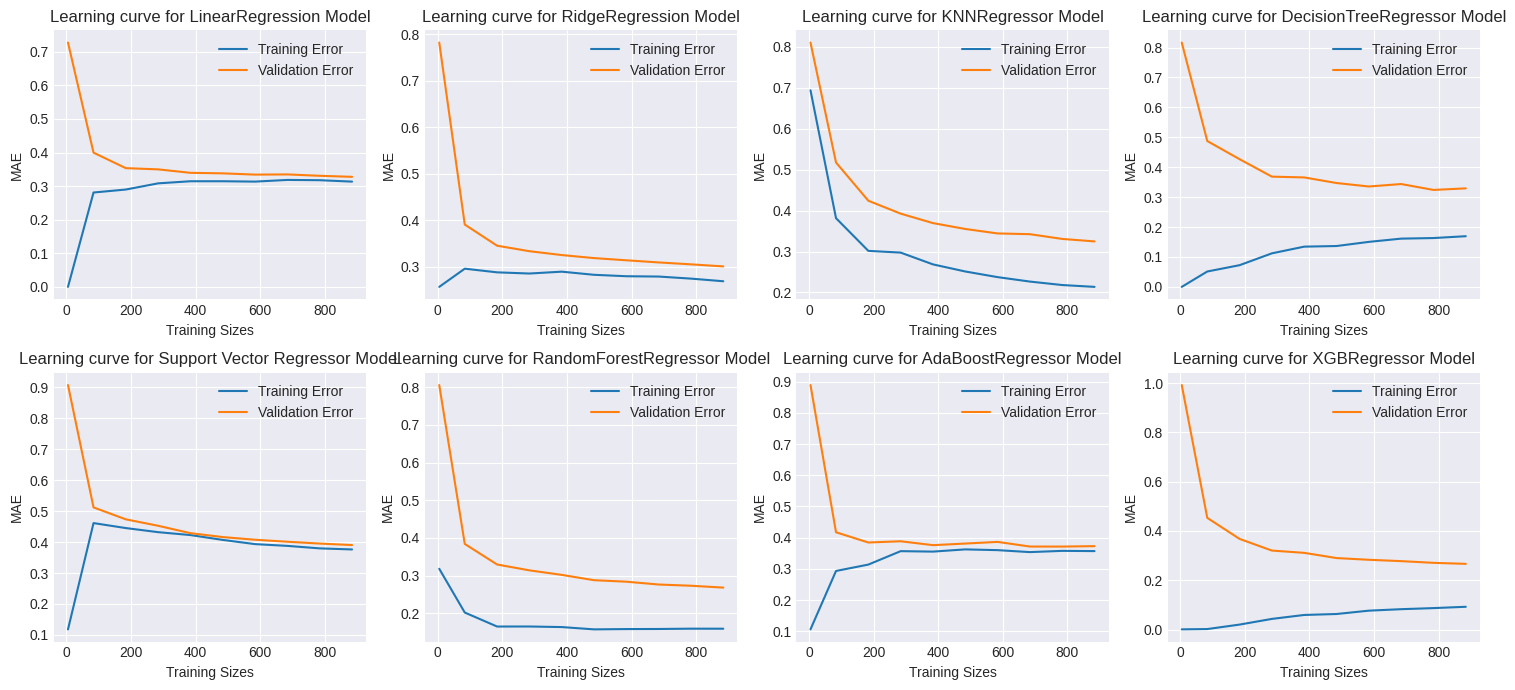

In [ ]:
# Creation of fig and axes using which curves will be plotted
plt.style.use("seaborn-v0_8-darkgrid")
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
# For easier indexing
ax = ax.flatten()

# A loop for traversing through all the models and plotting curves for each.
for idx, model in enumerate(models_curve):
    # Data to be put in place of X and y in the learning curve func.
    # Thus, need to be preprocessed.
    X_train_curve = step1.fit_transform(X_train)
    X_train_curve = pd.DataFrame(X_train_curve, columns=step1.get_feature_names_out())

    y_train_curve = StandardScaler().fit_transform(y_train.to_frame())
    y_train_curve = pd.DataFrame(y_train_curve, columns=["Price"])
    y_train_curve = y_train_curve.values.ravel()

    # Applying the learning curve function
    train_sizes, train_scores, test_scores = learning_curve(
        models_curve[model],
        X_train_curve,
        y_train_curve,
        train_sizes=np.array([5, 84, 184, 284, 384, 484, 584, 684, 784, 884]),
        cv=5,
        scoring="neg_mean_absolute_error",
    )

    # Raw conversion to dataframes
    train_df = pd.DataFrame(
        train_scores,
        columns=["Split0", "Split1", "Split2", "Split3", "Split4"],
        index=train_sizes,
    )
    test_df = pd.DataFrame(
        test_scores,
        columns=["Split0", "Split1", "Split2", "Split3", "Split4"],
        index=train_sizes,
    )

    # Converting the output data from above dfs into detailed dataframes for easier plotting of the learning curve
    train_df["train_sizes(train)"] = train_df.set_index(train_sizes, inplace=True)
    train_df["train_sizes(train)"] = train_sizes
    train_df = pd.DataFrame(
        train_scores,
        columns=["Split0", "Split1", "Split2", "Split3", "Split4"],
        index=train_df["train_sizes(train)"],
    )

    test_df["train_sizes(test)"] = test_df.set_index(train_sizes, inplace=True)
    test_df["train_sizes(test)"] = train_sizes
    test_df = pd.DataFrame(
        test_scores,
        columns=["Split0", "Split1", "Split2", "Split3", "Split4"],
        index=test_df["train_sizes(test)"],
    )

    # Calculating the mean which will be plotted for each training size representing the mean error on that size
    train_df_mean = -np.mean(train_df, axis=1)
    test_df_mean = -np.mean(test_df, axis=1)

    # print(f"{train_df_mean} {test_df_mean}")

    # Learning curve plotted
    ax[idx].plot(train_sizes, train_df_mean, label="Training Error")
    ax[idx].plot(train_sizes, test_df_mean, label="Validation Error")
    ax[idx].set_ylabel("MAE")
    ax[idx].set_xlabel("Training Sizes")
    ax[idx].set_title(f"Learning curve for {model} Model")
    ax[idx].legend()

plt.tight_layout()
plt.show()

The learning curves reveal varying model performances across our regression algorithms. Linear Regression and SVR exhibit high bias, suggesting underfitting, while the Decision Tree shows signs of overfitting with high variance. Random Forest and XGBoost emerge as the standout performers, demonstrating a good balance between bias and variance with potential for further improvement. KNN and Ridge Regression show moderate results.


Based on these observations, the focus should be on optimizing the Random Forest and XGBoost models through hyperparameter tuning and possibly increasing the dataset size but for the predictions, we will be considering Random Forest Regressor Model.

For the underperforming models, we should consider feature engineering to address underfitting and regularization techniques for overfitting.

Overall, while no model is perfect, Random Forest and XGBoost offer the most promising foundation for developing an effective regression solution for this particular problem set.

### Exporting the Model

In [ ]:
import pickle

# Exporting the dataset, kinda.
pickle.dump(data, open("data.pkl", "wb"))

# Eporting the best pipeline i.e., model
best_row = evaluation_metrics.iloc[0]
model_name = best_row.name
pipe_model = models_curve[model_name]
pickle.dump(pipe_model, open("model.pkl", "wb"))

In [ ]:
data

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
